In [57]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [58]:
#importing data
df = pd.read_csv(r'C:\Users\kunwa\Downloads\Students Exam Scores.csv')

# Understanding the Data 

In [59]:
df.shape

(30641, 15)

In [60]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [61]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


#### From above information we can see that overall maths scores of students is weaker as compared to other two scores.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29069 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           29069 non-null  int64 
 1   Gender               29069 non-null  object
 2   EthnicGroup          27331 non-null  object
 3   ParentEduc           27319 non-null  object
 4   LunchType            29069 non-null  object
 5   TestPrep             27337 non-null  object
 6   ParentMaritalStatus  27938 non-null  object
 7   PracticeSport        28473 non-null  object
 8   IsFirstChild         28219 non-null  object
 9   NrSiblings           29069 non-null  int32 
 10  TransportMeans       26096 non-null  object
 11  WklyStudyHours       28159 non-null  object
 12  MathScore            29069 non-null  int64 
 13  ReadingScore         29069 non-null  int64 
 14  WritingScore         29069 non-null  int64 
dtypes: int32(1), int64(4), object(10)
memory usage: 3.4+ MB


In [21]:
#changing datatype of NrSiblings column from float to integer
df.dropna(subset=['NrSiblings'], inplace=True)  
df['NrSiblings'] = df['NrSiblings'].astype(int)

In [23]:
#Dropping unnamed column 
df = df.drop("Unnamed: 0", axis=1)

# Exploratory Data Analysis

## Gender Distribution

[Text(0, 0, '15424'), Text(0, 0, '15217')]

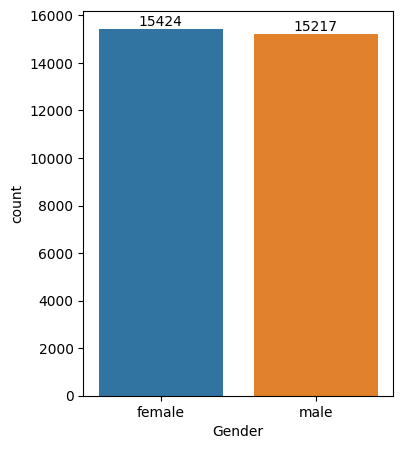

In [62]:
plt.figure(figsize =(4,5))
ax = sns.countplot(data = df, x= 'Gender')
ax.bar_label(ax.containers[0])

#### From above chart we can see that number of females in the data are slightly more as compared to males.

## Parents impacts on their childs education

In [36]:
gb= df.groupby("ParentEduc").agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


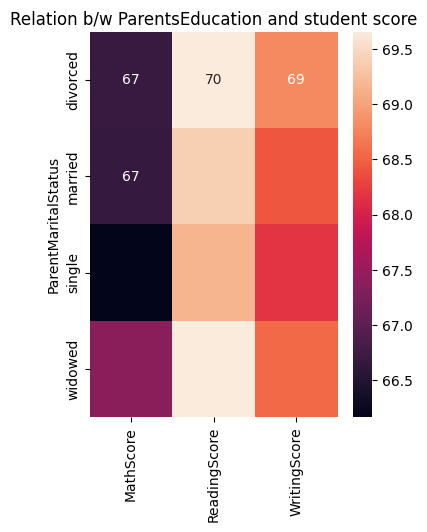

In [49]:
plt.figure(figsize =(4,5))
plt.title('Relation b/w ParentsEducation and student score')
sns.heatmap(gb, annot=True)
plt.show()

#### From above chart we can conclude that the education of the parents have a good impact on students.

In [45]:
gb1= df.groupby("ParentMaritalStatus").agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


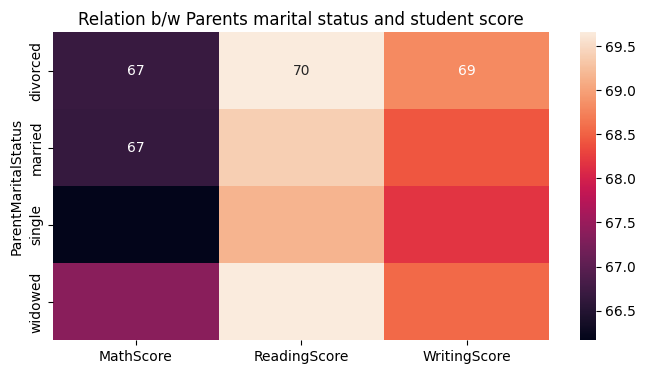

In [51]:
plt.figure(figsize =(8,4))
sns.heatmap(gb1, annot=True)
plt.title('Relation b/w Parents marital status and student score')
plt.show()

#### From above chart we can conclude that marital status of the parents have a very less or negligible impact on the student score.

## Checking for outliers in students scoring-

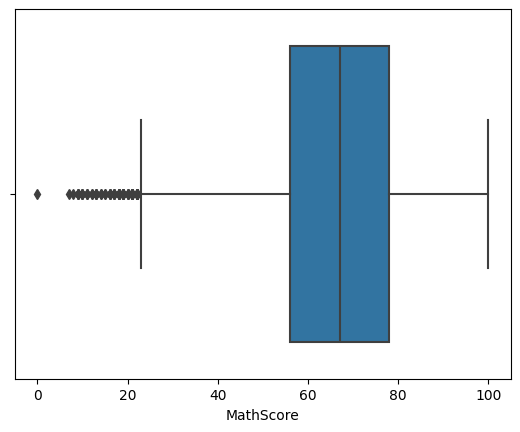

In [63]:
sns.boxplot(x='MathScore', data=df)
plt.show()

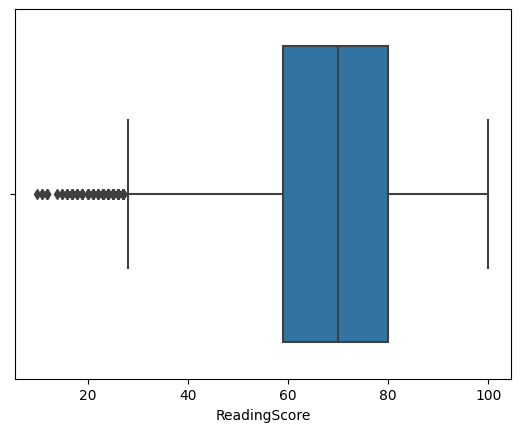

In [64]:
sns.boxplot(x='ReadingScore', data=df)
plt.show()

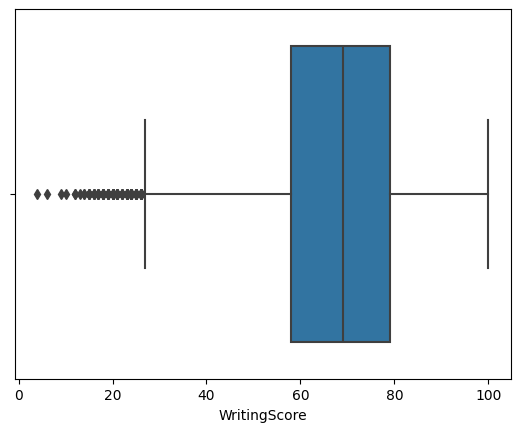

In [65]:
sns.boxplot(x='WritingScore', data=df)
plt.show()

#### We can see there are many outliers in above data. Like even there are students who have scored 0 marks.

## Comparison b/w participation in sports and their study schedule

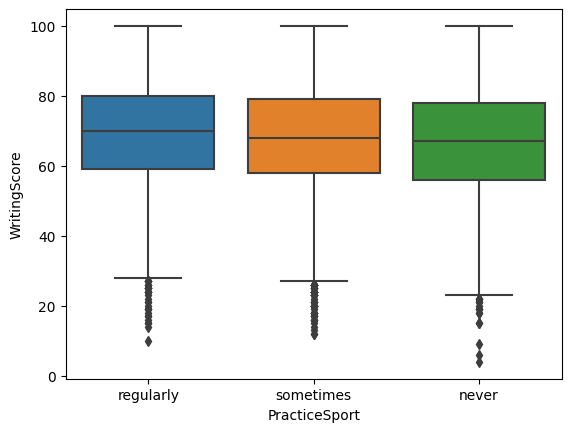

In [66]:
sns.boxplot(x='PracticeSport', y='WritingScore', data=df)
plt.show()

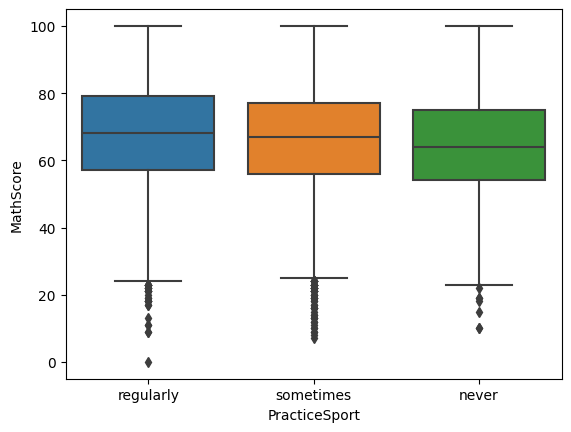

In [67]:
sns.boxplot(x='PracticeSport', y='MathScore', data=df)
plt.show()

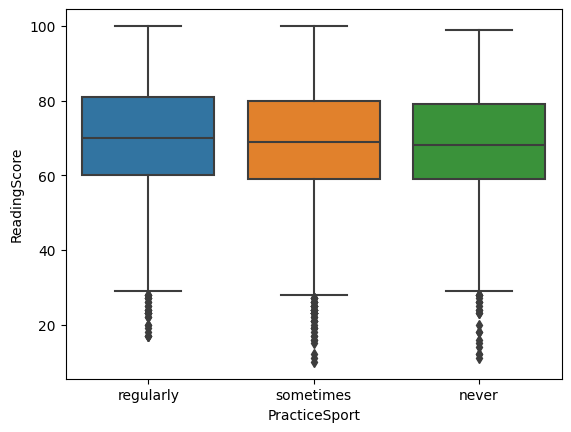

In [68]:
sns.boxplot(x='PracticeSport', y='ReadingScore', data=df)
plt.show()

### From above comparisons we can see that participation in sports affect on students scores is negligible or not affecting much.

## Comparison b/w No of Siblings and their study schedule

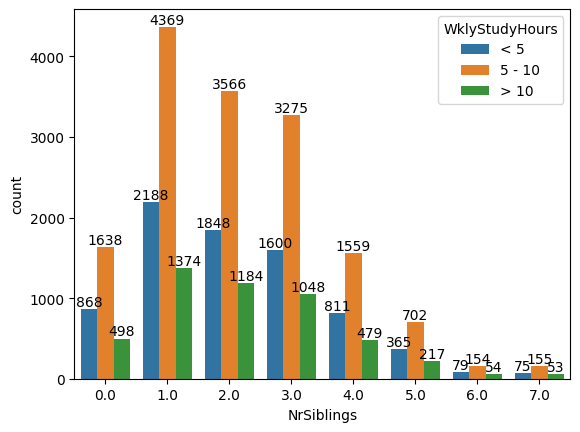

<Figure size 4000x2200 with 0 Axes>

In [77]:
sp = sns.countplot(x= 'NrSiblings', data=df, hue="WklyStudyHours")
plt.figure(figsize =(40,22))

for bars in sp.containers:
    sp.bar_label(bars)

#### From above chart we can see that the study schedule of students who have just one siblings is best among all.

## Distribution of Ethnic Groups

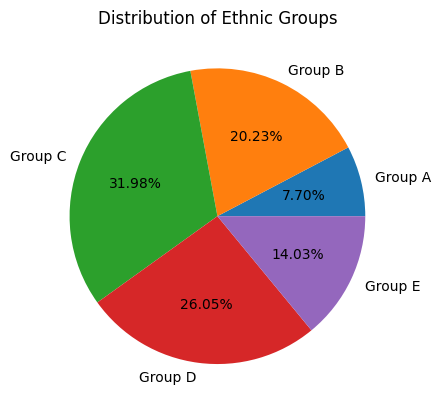

In [181]:
#creating a dataframe having count of all ethnic group data
groupA = df.loc[(df['EthnicGroup'] == 'group A')].count()
groupB = df.loc[(df['EthnicGroup'] == 'group B')].count()
groupC = df.loc[(df['EthnicGroup'] == 'group C')].count()
groupD = df.loc[(df['EthnicGroup'] == 'group D')].count()
groupE = df.loc[(df['EthnicGroup'] == 'group E')].count()

lbl = ['Group A','Group B','Group C',"Group D",'Group E']
my_list = [groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']]
plt.pie(my_list, labels=lbl, autopct='%1.2f%%')
plt.title("Distribution of Ethnic Groups")
plt.show()

C:\Users\kunwa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kunwa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kunwa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

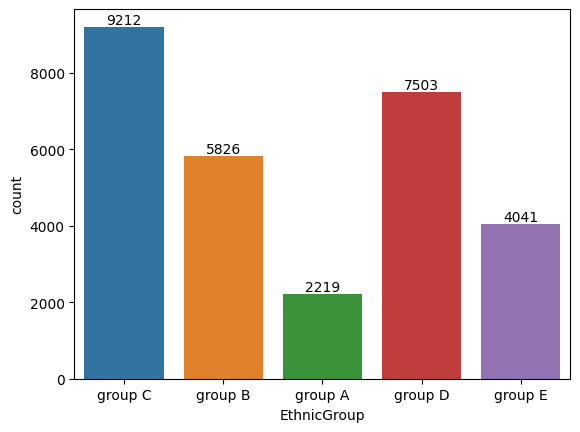

In [183]:
#checking by values
ax = sns.countplot (data=df , x= 'EthnicGroup')
ax.bar_label(ax.containers[0])

## Conclusion

### From above data we can overall see that average scores of the students are good but students who lie below average score either have more than one sibling or their parents are not much educated